In [1]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [2]:
!ls

eval_config_rb.yaml  eval.ipynb		  evals_rb.csv	    evals_rb_sp2.csv
eval_config_wd.yaml  evals_no_rotary.csv  evals_rb_sp1.csv  evals_wd.csv


In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [5]:
csv = pd.read_csv('evals_rb_sp2.csv', sep=',')

In [6]:
csv

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
0,0,earnings22,dev,0.247350,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,4096,0.875,SCConformerXL,-1
1,0,earnings22,dev,0.242707,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,8192,0.875,SCConformerXL,-1
2,0,earnings22,dev,0.243145,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,False,8192,0.875,SCConformerXL,-1
3,0,earnings22,dev,0.240583,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,16384,0.875,SCConformerXL,-1
4,0,earnings22,dev,0.239816,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,16384,0.875,SCConformerXL,-1
5,0,earnings22,dev,0.233990,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,32768,0.875,SCConformerXL,-1
6,0,earnings22,dev,0.235436,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,32768,0.875,SCConformerXL,-1
7,0,earnings22,dev,0.235020,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,65536,0.875,SCConformerXL,-1
8,0,earnings22,dev,0.235874,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,65536,0.875,SCConformerXL,-1
9,0,earnings22,dev,0.237078,rb_sp2,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,3,False,65536,0.875,SCConformerXL,-1


In [7]:
seq_lens = csv['seq_len'].unique().tolist()
seq_lens

[4096, 8192, 16384, 32768, 65536]

In [8]:
out_data_wd = {}
out_data_rb = {}
out_data = {}
for seq_len in seq_lens:
    sset = csv.loc[csv['dataset'] == 'tedlium'].loc[csv['split'] == 'dev'].loc[csv['seq_len'] == seq_len]
    if len(sset) == 3:
        out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
    else:
        print(f'Sequence length {seq_len} has {len(sset)} results')
    # wdsset = sset.loc[sset['name'].str.startswith('w')]
    # out_data_wd[seq_len] = {'wer': wdsset['wer'].mean()*100, 'std': wdsset['wer'].std()*100}
    # rbset = sset.loc[sset['name'].str.startswith('rb')]
    # out_data_rb[seq_len] = {'wer': rbset['wer'].mean()*100, 'std': rbset['wer'].std()*100}

Sequence length 4096 has 1 results
Sequence length 8192 has 2 results
Sequence length 16384 has 2 results
Sequence length 32768 has 2 results


In [9]:
out_data

{65536: {'wer': 7.149699716296378, 'std': 0.09735978970357485}}

NameError: name 'o2' is not defined

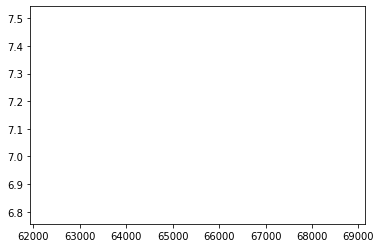

In [10]:
plt.plot(out_data.keys(), [out_data[k]['wer'] for k in out_data.keys()], label='Word')
plt.plot(o2.keys(), [o2[k]['wer'] for k in o2.keys()], label='Word + RB')

In [15]:
out_data_rb

{}

In [22]:
out_data_rb

{4096: {'wer': 6.516628271014234, 'std': 0.08344598445938176},
 8192: {'wer': 6.406757634827807, 'std': 0.09571565526861074},
 16384: {'wer': 6.372496898812684, 'std': 0.14544238545938923},
 32768: {'wer': 6.2366353594423725, 'std': 0.060286376382177445},
 65536: {'wer': 6.19528619528619, 'std': 0.03683255305835054},
 360000: {'wer': 6.1385787701577135, 'std': 0.09296386353786196}}

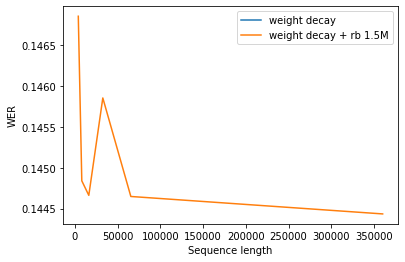

In [12]:
# log scale x axis:

plt.plot(seq_lens, [out_data_wd[seq_len]['wer'] for seq_len in seq_lens], label='weight decay')
plt.plot(seq_lens, [out_data_rb[seq_len]['wer'] for seq_len in seq_lens], label='weight decay + rb 1.5M')
plt.legend()
plt.xlabel('Sequence length')
plt.ylabel('WER')
plt.show()